# 1. Extraction

The following data is going to be extracted from season 1970 until 2019:
1. stats: https://www.lfchistory.net/SeasonArchive/Statistics/42
2. League table and position: https://www.lfchistory.net/SeasonArchive/LeagueTable/12
2. managers: https://www.lfchistory.net/Managers
3. goals/minute: https://www.lfchistory.net/SeasonArchive/Statistics/12
4. transfers: https://www.lfchistory.net/SeasonArchive/Transfers/12
5. palmares: https://es.wikipedia.org/wiki/Anexo:Estad%C3%ADsticas_del_Liverpool_Football_Club

In [1]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1 Statistics
## 1.1 Data Scraping

In [2]:

# since the data is not tidy on the website, is better to set the years as keys in the dictionary and the stats as
# values. Later on, keys and value are going to be glued together in a list to create the dataframe

YearDict = {}

# Initial and ending year index in webpage

InitialIndex = 12
FinalIndex = 129

while InitialIndex <= FinalIndex:

    try:
        
        # skipping void indices in the webpage
        
        if InitialIndex == 47:
            InitialIndex = 104
        if InitialIndex == 105:
            InitialIndex = 115

        Data = []

        my_url = 'https://www.lfchistory.net/SeasonArchive/Statistics/' + str(InitialIndex)

        req = Request(my_url, headers={'User-Agent': 'Mozilla/5.0'})

        web_byte = urlopen(req).read()

        webpage = web_byte.decode('utf-8')

        # html parsing
        page_soup = soup(webpage, 'html.parser')

        # here, info3 - 1 is the key

        KeyYear1 = page_soup.findAll('div', {'class': 'lf-box'})
        KeyYear2 = KeyYear1[0].find('h4').text
        KeyYear3 = float(KeyYear2.split('-')[1].split(' ')[0])
        
        if KeyYear3 < 1970:
            print(InitialIndex, KeyYear3 - 1, '\n')
            InitialIndex += 1
            continue


        # extracting the data

        info1 = page_soup.findAll('ul', {'class': "list-unstyled"})
        info2 = info1[0].find_all('li')

        for i in range(len(info2)):
            info3 = info2[i].text
            info4 = info3.split(':')
            # on the go data cleaning
            Data.append(float(info4[1].strip().replace(',', '')))

        print(InitialIndex, KeyYear3 - 1, end = '---')

        # creating dictionary

        YearDict[KeyYear3 - 1] = Data

        InitialIndex += 1

    except:
        print('index {0} doesnt work'.format(InitialIndex))
        InitialIndex += 1
        continue


12 1970.0---13 1971.0---14 1972.0---15 1973.0---16 1974.0---17 1975.0---18 1976.0---19 1977.0---20 1978.0---21 1979.0---22 1980.0---23 1982.0---24 1981.0---25 1983.0---26 1984.0---27 1985.0---28 1986.0---29 1987.0---30 1988.0---31 1989.0---32 1990.0---33 1992.0---34 1991.0---35 1993.0---36 1994.0---37 1995.0---index 38 doesnt work
39 1996.0---40 1997.0---41 1998.0---42 2000.0---43 1999.0---44 2001.0---45 2002.0---46 2003.0---104 2004.0---115 2005.0---116 2006.0---117 2007.0---118 2008.0---119 2009.0---120 2010.0---121 2011.0---122 2012.0---123 2013.0---124 2014.0---125 2015.0---126 2016.0---127 2017.0---128 2018.0---129 2019.0---

In [3]:
# Sorting the dictionary by keys

YearDict = dict(sorted(YearDict.items()))
StatsList = []

# Putting together keys and values in a list to create dataframe

YearList = list(YearDict.keys())
DataList = list(YearDict.values())

for i in range(len(YearList)):
    MiniList = []
    MiniList.append(YearList[i])
    for j in range(len(DataList[i])):
        MiniList.append(DataList[i][j])
    StatsList.append(MiniList)


In [4]:
# grabing columns names
ColumnsNamesStats = ['Year']

info1 = page_soup.findAll('ul', {'class': "list-unstyled"})
info2 = info1[0].find_all('li')

for i in range(len(info2)):
    info3 = info2[i].text
    info4 = info3.split(':')
    ColumnsNamesStats.append(info4[0])


In [5]:
# DataFrame

StatsDf = pd.DataFrame(StatsList, columns = ColumnsNamesStats)
StatsDf = StatsDf.astype({"Year": int})
StatsDf.set_index('Year', inplace=True)
StatsDf.head(10)


,Total games,Games won,Games drawn,Games lost,Clean sheets - league,Clean sheets - overall,Total goals,Average attendance at home - league,Average attendance at home - overall,Average goals per game - League,Average goals per game - Overall,Average goal minute - League,Average goal minute - Overall
Year,,,,,,,,,,,,,
1970,62.0,28.0,23.0,11.0,22.0,34.0,67.0,45136.0,44732.0,1.43,1.52,45.0,50.0
1971,53.0,28.0,11.0,14.0,22.0,28.0,76.0,47689.0,46150.0,2.29,2.08,50.0,50.0
1972,66.0,37.0,18.0,11.0,14.0,26.0,108.0,48103.0,44863.0,2.14,2.18,47.0,49.0
1973,61.0,32.0,19.0,10.0,19.0,30.0,80.0,42427.0,40307.0,1.62,1.61,48.0,49.0
1974,53.0,25.0,15.0,13.0,18.0,24.0,82.0,45966.0,42362.0,2.10,2.37,48.0,49.0
1975,59.0,33.0,18.0,8.0,23.0,29.0,95.0,41670.0,39847.0,1.95,2.14,60.0,58.0
1976,62.0,36.0,14.0,12.0,18.0,27.0,103.0,47284.0,46171.0,2.24,2.23,54.0,52.0
1977,62.0,35.0,14.0,13.0,23.0,32.0,104.0,45659.0,43987.0,1.76,2.17,49.0,50.0
1978,54.0,35.0,11.0,8.0,28.0,34.0,98.0,46500.0,45391.0,2.43,2.31,44.0,46.0


## 1.2 Viz

still to be added: trophies and position

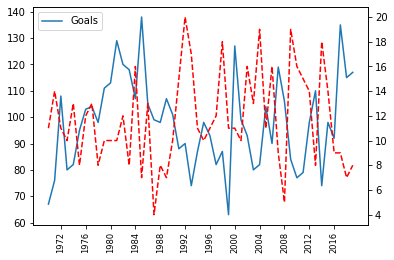

In [6]:
fig, ax = plt.subplots()

ax.plot(StatsDf.index, StatsDf['Total goals'], label = 'Goals')
ax2 = ax.twinx()
ax2.plot(StatsDf.index, StatsDf['Games lost'], label = 'Games lost', color ='r', linestyle = '--')
ax.set_xticks([x for x in StatsDf.index if x % 4 == 0])
ax.set_xticklabels([x for x in StatsDf.index if x % 4 == 0], rotation = 90, fontsize = 'small')
ax.legend(loc='best')

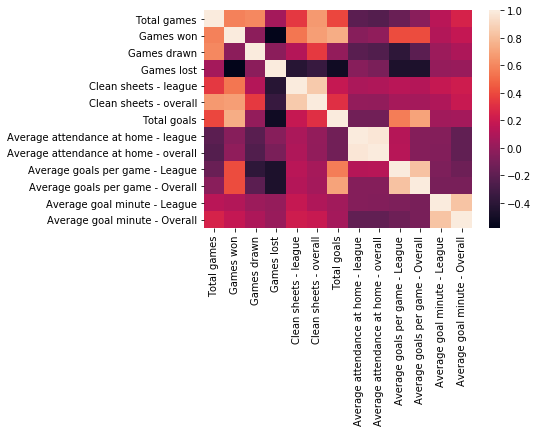

In [7]:
sns.heatmap(StatsDf.loc[:, 'Total games':'Average goal minute - Overall'].corr())

# 2 League table and position
https://www.lfchistory.net/SeasonArchive/LeagueTable/12

In [8]:
# webpage access

my_url = 'https://www.lfchistory.net/SeasonArchive/LeagueTable/12'

req = Request(my_url, headers={'User-Agent': 'Mozilla/5.0'})

web_byte = urlopen(req).read()

webpage = web_byte.decode('utf-8')

# html parsing
page_soup = soup(webpage, 'html.parser')

# columns names

LeagueColumnsNames = []

info1 = page_soup.find('div', {'class': 'table-responsive'}).find('tr')
info2 = info1.findAll('th')

for i in range(len(info2)):
    LeagueColumnsNames.append(info2[i].text)


In [9]:
YearDict = {}

# Initial and ending year index in webpage

InitialIndex = 12
FinalIndex = 129

while InitialIndex <= FinalIndex:

    try:
        # skipping void indices in the webpage

        if InitialIndex == 47:
            InitialIndex = 104
        if InitialIndex == 105:
            InitialIndex = 115

        Data = []

        my_url = 'https://www.lfchistory.net/SeasonArchive/LeagueTable/' + str(InitialIndex)

        req = Request(my_url, headers={'User-Agent': 'Mozilla/5.0'})

        web_byte = urlopen(req).read()

        webpage = web_byte.decode('utf-8')

        # html parsing
        page_soup = soup(webpage, 'html.parser')

        # here, info3 - 1 is the key

        KeyYear1 = page_soup.findAll('div', {'class': 'lf-box'})
        KeyYear2 = KeyYear1[0].find('h4').text
        KeyYear3 = float(KeyYear2.split('-')[1].split(' ')[0])

        # new squad chunk
        ListOfDict = []
        RowDict = {}

        info1 = page_soup.find('tbody').findAll('tr')

        for j in range(len(info1)):

            RowDict = {}    

            info2 = info1[j].findAll('td')

            count = 0
            for i in LeagueColumnsNames:
                RowDict[i] = info2[count].text
                count += 1

            ListOfDict.append(RowDict)

        SquadDf = pd.DataFrame(ListOfDict)

        # creating dictionary

        YearDict[int(KeyYear3 - 1)] = SquadDf
        print(int(InitialIndex), KeyYear3 - 1, end='  ')

        InitialIndex += 1

    except:
        print('index {0} doesnt work'.format(InitialIndex))
        InitialIndex += 1
        continue


12 1970.0  13 1971.0  14 1972.0  15 1973.0  16 1974.0  17 1975.0  18 1976.0  19 1977.0  20 1978.0  21 1979.0  22 1980.0  23 1982.0  24 1981.0  25 1983.0  26 1984.0  27 1985.0  28 1986.0  29 1987.0  30 1988.0  31 1989.0  32 1990.0  33 1992.0  34 1991.0  35 1993.0  36 1994.0  37 1995.0  index 38 doesnt work
39 1996.0  40 1997.0  41 1998.0  42 2000.0  43 1999.0  44 2001.0  45 2002.0  46 2003.0  104 2004.0  115 2005.0  116 2006.0  117 2007.0  118 2008.0  119 2009.0  120 2010.0  121 2011.0  122 2012.0  123 2013.0  124 2014.0  125 2015.0  126 2016.0  127 2017.0  128 2018.0  129 2019.0  

In [10]:
for i in range(1980, 2020):
    print(i, '\n', YearDict[i].head(3))
    print(' ')


1980 
    #          Team   P   W  D  L   F   A G.Avg PTS
0  1   Aston Villa  42  10  5  6  32  27    32  60
1  2  Ipswich Town  42   8  6  7  32  29    34  56
2  3       Arsenal  42   6  7  8  25  28    16  53
 
1981 
    #               Team   P   W  D  L   F   A G.Avg PTS
0  1       Liverpool FC  42  12  6  3  41  18    48  87
1  2       Ipswich Town  42   9  4  8  28  28    22  83
2  3  Manchester United  42  10  6  5  32  20    30  78
 
1982 
    #               Team   P  W  D   L   F   A G.Avg PTS
0  1       Liverpool FC  42  8  6   7  32  21    50  82
1  2            Watford  42  6  3  12  25  37    17  71
2  3  Manchester United  42  5  6  10  17  28    18  70
 
1983 
    #               Team   P  W  D  L   F   A G.Avg PTS
0  1       Liverpool FC  42  8  9  4  23  20    41  80
1  2        Southampton  42  7  7  7  22  21    28  77
2  3  Nottingham Forest  42  8  4  9  29  28    31  74
 
1984 
    #          Team   P   W  D  L   F   A G.Avg PTS
0  1       Everton  42  12  3  6  

In [11]:
YearDict[2010]

ValuesList = []
YearList2 = []

for x in YearDict.values():
    ValuesList.append(x)

for x in YearDict.keys():
    YearList2.append(x)

LeagueS = pd.Series(ValuesList, index = YearList2 )

LeagueS[2000]


,#,Team,P,W,D,L,F,A,G.Avg,PTS
0,1,Manchester United,38,9,6,4,30,19,48,80
1,2,Arsenal,38,5,7,7,18,25,25,70
2,3,Liverpool FC,38,7,5,7,31,25,32,69
3,4,Leeds United,38,9,5,5,28,22,21,68
4,5,Ipswich Town,38,9,1,9,26,27,15,66
5,6,Chelsea,38,4,7,8,24,25,23,61
6,7,Sunderland,38,6,5,8,22,25,5,57
7,8,Aston Villa,38,5,7,7,19,23,3,54
8,9,Charlton Athletic,38,3,5,11,19,38,-7,52
9,10,Southampton,38,3,8,8,13,26,-8,52


In [12]:
LiverpoolStats = pd.DataFrame()

for i in LeagueS.index:
    LiverpoolStats = pd.concat([LiverpoolStats, LeagueS[i][LeagueS[i].Team == 'Liverpool FC']])


LiverpoolStats.reset_index(inplace = True)

del LiverpoolStats['index']

LiverpoolStats.index = YearList2

LiverpoolStats = LiverpoolStats.astype({'#':int, 'P':int, 'W':int, 'D':int, 'L':int, 'F':float, 'A':float, 'G.Avg':float, 'PTS':float})

LiverpoolStats.head()



,#,Team,P,W,D,L,F,A,G.Avg,PTS
1970,5,Liverpool FC,42,6,7,8,12.0,14.0,1.75,51.0
1971,3,Liverpool FC,42,7,6,8,16.0,14.0,2.13,57.0
1972,1,Liverpool FC,42,8,7,6,27.0,23.0,1.71,60.0
1973,2,Liverpool FC,42,4,11,6,18.0,20.0,1.68,57.0
1974,2,Liverpool FC,42,6,6,9,16.0,22.0,1.54,51.0


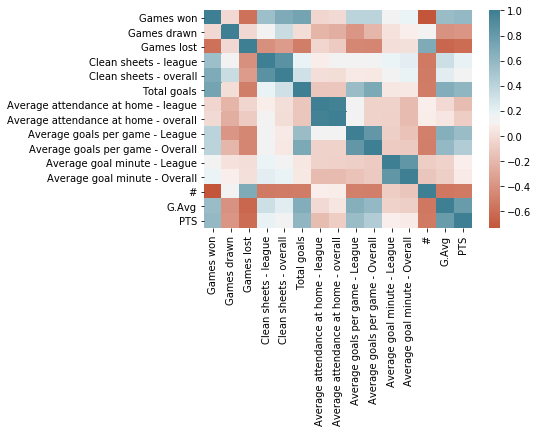

In [13]:
# merging with 1.1

TableStats = pd.merge(StatsDf, LiverpoolStats, how ='inner', left_index=True, right_index=True)
del TableStats['Total games']
del TableStats['Team']
del TableStats['P']
del TableStats['W']
del TableStats['D']
del TableStats['L']
del TableStats['F']
del TableStats['A']

sns.heatmap(TableStats.corr(), cmap=sns.diverging_palette(20, 220, as_cmap=True))

# 1.3 managers
https://www.lfchistory.net/Managers

In [14]:

# webpage access
# findAll('table', {'class': 'items'})
# find('thead')
# find_all('th')


my_url = 'https://www.lfchistory.net/Managers'

req = Request(my_url, headers={'User-Agent': 'Mozilla/5.0'})

web_byte = urlopen(req).read()

webpage = web_byte.decode('utf-8')

# html parsing
page_soup = soup(webpage, 'html.parser')


ManagersList = []
StartingYear = []
Year = []

info1 = page_soup.find('ul', {'class': 'lf-profile_images_list'}).findAll('li')

for i in range(len(info1)):
    ManagersList.append(info1[i].find('a').text)

info1 = page_soup.find('ul', {'class': 'lf-profile_images_list'}).findAll('li')

for i in range(len(info1)):
    StartingYear.append(info1[i].find('span').text)

for i in StartingYear:
    Year.append(i.strip().split(' ')[-1])

ManagersDict = {'Manager': ManagersList, 'Starting Date': StartingYear, 'Starting Year': Year}

ManagersDf = pd.DataFrame(ManagersDict)
ManagersDf['Starting Year'] = ManagersDf['Starting Year'].astype('int')

ManagersDf2 = ManagersDf.drop(columns='Starting Date')
ManagersDf2.set_index('Starting Year', inplace=True)
ManagersDf2 = ManagersDf2[ManagersDf2['Manager'] != 'Ronnie Moran']

ManagersDf2

TableStatsManager = pd.merge(TableStats, ManagersDf2, how ='left', left_index=True, right_index=True)
TableStatsManager['Manager'] = TableStatsManager['Manager'].fillna(method='ffill')
TableStatsManager

TableStatsManager.groupby('Manager').sum()




,Games won,Games drawn,Games lost,Clean sheets - league,Clean sheets - overall,Total goals,Average attendance at home - league,Average attendance at home - overall,Average goals per game - League,Average goals per game - Overall,Average goal minute - League,Average goal minute - Overall,#,G.Avg,PTS
Manager,,,,,,,,,,,,,,,
Bob Paisley,307.0,132.0,96.0,183.0,255.0,955.0,379352.0,360236.0,18.96,20.75,452.0,459.0,15,301.67,573.0
Brendan Rodgers,80.0,35.0,40.0,40.0,51.0,282.0,134077.0,132443.0,6.11,5.97,138.0,143.0,15,83.00,207.0
Evans / Houllier,19.0,11.0,18.0,8.0,12.0,87.0,43321.0,39427.0,2.32,2.21,48.0,49.0,7,19.00,54.0
Graeme Souness,67.0,49.0,52.0,37.0,48.0,252.0,110453.0,101450.0,5.14,5.65,150.0,151.0,20,18.00,183.0
Gérard Houllier,165.0,81.0,79.0,84.0,126.0,549.0,260400.0,246780.0,10.75,10.65,298.0,301.0,25,147.00,394.0
Joe Fagan,70.0,37.0,24.0,39.0,63.0,225.0,66486.0,63638.0,4.09,4.60,97.0,101.0,3,74.00,157.0
Jürgen Klopp,163.0,66.0,47.0,76.0,108.0,557.0,245351.0,246261.0,12.11,11.68,246.0,244.0,19,214.00,407.0
Kenny Dalglish,194.0,79.0,49.0,97.0,132.0,648.0,222779.0,211361.0,13.21,13.95,301.0,308.0,9,260.00,486.0
Kenny Dalglish (2nd term),24.0,12.0,15.0,12.0,14.0,79.0,44253.0,44242.0,1.26,1.71,48.0,51.0,8,7.00,52.0


# 1.4 goals/minute:
 https://www.lfchistory.net/SeasonArchive/Statistics/12
 
 ## come back to format minutes

In [15]:

# findAll('table', {'class': 'items'})
# find('thead')
# find_all('th')


# since the data is not tidy on the website, is better to set the years as keys in the dictionary and the stats as
# values. Later on, keys and value are going to be glued together in a list to create the dataframe

YearDict = {}

# Initial and ending year index in webpage

InitialIndex = 12
FinalIndex = 129

while InitialIndex <= FinalIndex:

    try:
        
        # skipping void indices in the webpage
        
        if InitialIndex == 47:
            InitialIndex = 104
        if InitialIndex == 105:
            InitialIndex = 115

        Data = []

        my_url = 'https://www.lfchistory.net/SeasonArchive/Statistics/' + str(InitialIndex)

        req = Request(my_url, headers={'User-Agent': 'Mozilla/5.0'})

        web_byte = urlopen(req).read()

        webpage = web_byte.decode('utf-8')

        # html parsing
        page_soup = soup(webpage, 'html.parser')

        # here, info3 - 1 is the key

        KeyYear1 = page_soup.findAll('div', {'class': 'lf-box'})
        KeyYear2 = KeyYear1[0].find('h4').text
        KeyYear3 = float(KeyYear2.split('-')[1].split(' ')[0])
        
        if KeyYear3 < 1970:
            print(InitialIndex, KeyYear3 - 1, '\n')
            InitialIndex += 1
            continue


        # extracting the data

        info1 = page_soup.findAll('ul', {'class': "list-unstyled"})
        info2 = info1[1].find_all('li')

        for i in range(len(info2)):
            info3 = info2[i].text
            info4 = info3.split(':')[1]
            # on the go data cleaning
            Data.append(float(info4.strip().replace(',', '.')))

        print(InitialIndex, int(KeyYear3 - 1), end = ' : ')
        print(Data)

        # creating dictionary

        YearDict[KeyYear3 - 1] = Data

        InitialIndex += 1

    except:
        print('index {0} doesnt work'.format(InitialIndex))
        InitialIndex += 1
        continue


12 1970 : [4.0, 18.0, 8.0, 13.0, 10.0, 12.0, 2.0]
13 1971 : [10.0, 7.0, 14.0, 16.0, 14.0, 15.0, 0.0]
14 1972 : [11.0, 20.0, 20.0, 17.0, 15.0, 24.0, 1.0]
15 1973 : [10.0, 18.0, 8.0, 14.0, 11.0, 19.0, 0.0]
16 1974 : [10.0, 10.0, 19.0, 11.0, 17.0, 15.0, 0.0]
17 1975 : [7.0, 13.0, 8.0, 16.0, 21.0, 30.0, 0.0]
18 1976 : [14.0, 11.0, 17.0, 11.0, 23.0, 27.0, 0.0]
19 1977 : [13.0, 17.0, 14.0, 17.0, 17.0, 26.0, 0.0]
20 1978 : [16.0, 16.0, 13.0, 22.0, 13.0, 18.0, 0.0]
21 1979 : [16.0, 12.0, 17.0, 22.0, 20.0, 24.0, 0.0]
22 1980 : [12.0, 24.0, 19.0, 16.0, 14.0, 27.0, 1.0]
23 1982 : [14.0, 21.0, 21.0, 11.0, 22.0, 30.0, 1.0]
24 1981 : [16.0, 15.0, 16.0, 24.0, 28.0, 25.0, 5.0]
25 1983 : [19.0, 20.0, 18.0, 16.0, 24.0, 20.0, 1.0]
26 1984 : [11.0, 14.0, 13.0, 24.0, 17.0, 25.0, 3.0]
27 1985 : [10.0, 24.0, 19.0, 26.0, 30.0, 24.0, 5.0]
28 1986 : [16.0, 14.0, 12.0, 18.0, 19.0, 26.0, 0.0]
29 1987 : [7.0, 10.0, 18.0, 22.0, 20.0, 22.0, 0.0]
30 1988 : [11.0, 11.0, 12.0, 16.0, 24.0, 22.0, 2.0]
31 1989 : [19.0, 11

In [16]:
# Sorting the dictionary by keys

YearDict = dict(sorted(YearDict.items()))
StatsList = []

# Putting together keys and values in a list to create dataframe

YearList = list(YearDict.keys())
DataList = list(YearDict.values())

for i in range(len(YearList)):
    MiniList = []
    MiniList.append(YearList[i])
    for j in range(len(DataList[i])):
        MiniList.append(DataList[i][j])
    StatsList.append(MiniList)

In [17]:
# grabing columns names
ColumnsNamesStats = ['Year']

info1 = page_soup.findAll('ul', {'class': "list-unstyled"})
info2 = info1[1].find_all('li')

for i in range(len(info2)):
    info3 = info2[i].text
    info4 = info3.split(':')[0]
    ColumnsNamesStats.append(info4)

In [57]:
# DataFrame

StatsDf = pd.DataFrame(StatsList, columns = ColumnsNamesStats)
StatsDf = StatsDf.astype({"Year": int})
StatsDf.set_index('Year', inplace=True)
StatsDf.head(10)
#StatsDf.to_csv('/Users/jaimebecerra/Desktop/data latte/FcLiverpoolCharm/GoalsMinuteIntervals.csv')

In [19]:
GoalsAvg = []

for i in StatsDf.columns:
    GoalsAvg.append(StatsDf[i].mean())

StatsDf.describe()

,Goals from 1 to 15,Goals from 16 to 30,Goals from 31 to 45,Goals from 46 to 60,Goals from 61 to 75,Goals from 76 to 90,Goals from 91 to 120
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,11.800000,14.840000,15.320000,16.560000,17.240000,21.220000,1.020000
std,3.917517,4.648283,4.306805,4.131314,4.578388,5.704599,1.392253
min,4.000000,7.000000,6.000000,9.000000,10.000000,12.000000,0.000000
25%,10.000000,11.000000,12.250000,14.000000,14.000000,18.000000,0.000000
50%,11.000000,14.000000,15.000000,16.000000,17.000000,20.000000,0.500000
75%,14.000000,18.000000,18.000000,19.000000,20.750000,25.000000,1.750000
max,22.000000,27.000000,26.000000,26.000000,30.000000,35.000000,5.000000


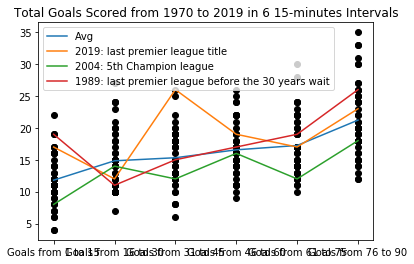

In [20]:
fig, ax = plt.subplots()
plt.rc('figure', figsize=(15, 10))

for i in StatsDf.index:
    ax.plot(StatsDf.loc[i, :'Goals from 76 to 90'], 'o', label=None, color='k')

ax.plot(GoalsAvg[:-1], label= 'Avg')
ax.plot(StatsDf.loc[2019, :'Goals from 76 to 90'], label= '2019: last premier league title')
ax.plot(StatsDf.loc[2004, :'Goals from 76 to 90'], label= '2004: 5th Champion league')
ax.plot(StatsDf.loc[1989, :'Goals from 76 to 90'], label= '1989: last premier league before the 30 years wait')

ax.set_title('Total Goals Scored from 1970 to 2019 in 6 15-minutes Intervals')
ax.legend(loc='best')
#plt.savefig('/Users/jaimebecerra/Desktop/goals.png')

# 1.5 transfers
https://www.lfchistory.net/SeasonArchive/Transfers/12

In [21]:

def CleanNumber(number):
    number = number.replace(',', '')
    number = number.replace('*', '')
    number = number.replace('£', '')
    number = number.replace(' ', '')
    number = number.strip()   
    if number.isalpha():
        number = 0
    number = float(number)
    return number

# findAll('table', {'class': 'items'})
# find('thead')
# find_all('th')

YearDict = {}

# Initial and ending year index in webpage

InitialIndex = 12
FinalIndex = 129

while InitialIndex <= FinalIndex:

    try:
        
        # skipping void indices in the webpage
        
        if InitialIndex == 47:
            InitialIndex = 104
        if InitialIndex == 105:
            InitialIndex = 115


        my_url = 'https://www.lfchistory.net/SeasonArchive/Transfers/' + str(InitialIndex)

        req = Request(my_url, headers={'User-Agent': 'Mozilla/5.0'})

        web_byte = urlopen(req).read()

        webpage = web_byte.decode('utf-8')

        # html parsing
        page_soup = soup(webpage, 'html.parser')

        KeyYear1 = page_soup.findAll('div', {'class': 'lf-box'})
        KeyYear2 = KeyYear1[0].find('h4').text
        KeyYear3 = float(KeyYear2.split('-')[1].split(' ')[0])
        
        # change ending index for 1 when extracting out's
        # Getting 'In's'

        ListMom = []

        info1 = page_soup.findAll('div', {'class': 'table-responsive'})[0]
        info2 = info1.find('tbody').find_all('tr')

        for i in range(len(info2)):
            ListSon = []
            info3 = info2[i].find_all('td')
            for j in range(len(info3)):
                ListSon.append(info3[j].text.strip())
            ListSon.insert(0, 'In')
            ListMom.append(ListSon)



        # Getting 'Out's'

        info1 = page_soup.findAll('div', {'class': 'table-responsive'})[1]
        info2 = info1.find('tbody').find_all('tr')

        for i in range(len(info2)):
            ListSon = []
            info3 = info2[i].find_all('td')
            for j in range(len(info3)):
                ListSon.append(info3[j].text.strip())
            ListSon.insert(0, 'Out')
            ListMom.append(ListSon)

        # Cleaning pounds

        for i in range(len(ListMom)):
            ListMom[i][3] = CleanNumber(ListMom[i][3])

        # Columns names

        ColumnsNames = ['In/Out', 'Name', 'Club', 'price', 'Date']

        # Dataframe

        TransferDf = pd.DataFrame(ListMom, columns = ColumnsNames)

        YearDict[int(KeyYear3 - 1)] = TransferDf
        
        print(InitialIndex, end=' ')

        InitialIndex += 1

    except:
        print('index {0} doesnt work'.format(InitialIndex), end=' ')
        InitialIndex += 1
        continue

print('\n', 'end')

12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 index 38 doesnt work 39 40 41 42 43 44 45 46 104 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 
 end


In [56]:
YearDict[1970]
SquadTransfer = pd.DataFrame()

for i in YearDict:
    YearDict[i]['year'] = i

for i in YearDict:
    SquadTransfer = SquadTransfer.append(YearDict[i])


SquadTransfer.reset_index(inplace=True)
#SquadTransfer.to_csv('/Users/jaimebecerra/Desktop/data latte/FcLiverpoolCharm/Transfers.csv')

In [23]:
YearIns = {}

for i in YearDict:
    YearIns[i] = [YearDict[i][YearDict[i]['In/Out'] == 'In']['price'].sum(), YearDict[i][YearDict[i]['In/Out'] == 'Out']['price'].sum()]

YearInsdf = pd.DataFrame(YearIns)

YearInsdf = YearInsdf.T

YearInsdf['Money spent (-)'] = YearInsdf[0]
YearInsdf['Money gained (+)'] = YearInsdf[1]

del YearInsdf[0]
del YearInsdf[1]
YearInsdf.head()



,Money spent (-),Money gained (+)
1970,153000.0,90000.0
1971,15000.0,130000.0
1972,135500.0,72000.0
1973,100000.0,18000.0
1974,441000.0,361000.0


In [24]:
LaMetaTable = pd.merge(TableStatsManager, YearInsdf, how ='left', left_index=True, right_index=True)
LaMetaTable

,Games won,Games drawn,Games lost,Clean sheets - league,Clean sheets - overall,Total goals,Average attendance at home - league,Average attendance at home - overall,Average goals per game - League,Average goals per game - Overall,Average goal minute - League,Average goal minute - Overall,#,G.Avg,PTS,Manager,Money spent (-),Money gained (+)
1970,28.0,23.0,11.0,22.0,34.0,67.0,45136.0,44732.0,1.43,1.52,45.0,50.0,5,1.75,51.0,NaN,153000.0,90000.0
1971,28.0,11.0,14.0,22.0,28.0,76.0,47689.0,46150.0,2.29,2.08,50.0,50.0,3,2.13,57.0,NaN,15000.0,130000.0
1972,37.0,18.0,11.0,14.0,26.0,108.0,48103.0,44863.0,2.14,2.18,47.0,49.0,1,1.71,60.0,NaN,135500.0,72000.0
1973,32.0,19.0,10.0,19.0,30.0,80.0,42427.0,40307.0,1.62,1.61,48.0,49.0,2,1.68,57.0,NaN,100000.0,18000.0
1974,25.0,15.0,13.0,18.0,24.0,82.0,45966.0,42362.0,2.10,2.37,48.0,49.0,2,1.54,51.0,Bob Paisley,441000.0,361000.0
1975,33.0,18.0,8.0,23.0,29.0,95.0,41670.0,39847.0,1.95,2.14,60.0,58.0,1,2.13,60.0,Bob Paisley,110000.0,72000.0
1976,36.0,14.0,12.0,18.0,27.0,103.0,47284.0,46171.0,2.24,2.23,54.0,52.0,1,29.00,57.0,Bob Paisley,300000.0,600000.0
1977,35.0,14.0,13.0,23.0,32.0,104.0,45659.0,43987.0,1.76,2.17,49.0,50.0,2,31.00,57.0,Bob Paisley,862000.0,163000.0
1978,35.0,11.0,8.0,28.0,34.0,98.0,46500.0,45391.0,2.43,2.31,44.0,46.0,1,69.00,68.0,Bob Paisley,710000.0,265000.0
1979,35.0,15.0,10.0,19.0,27.0,111.0,44578.0,42233.0,2.19,2.32,48.0,50.0,1,51.00,60.0,Bob Paisley,550000.0,365000.0


In [25]:
x = LaMetaTable.loc[2000:].groupby(['Manager', '#'])['Money spent (-)'].sum()
x


Manager                    #
Brendan Rodgers            2     41300000.0
                           6    116850000.0
                           7     49900000.0
Gérard Houllier            2     18800000.0
                           3     21500000.0
                           4     11500000.0
                           5     18400000.0
Jürgen Klopp               1     11650000.0
                           2    175200000.0
                           4    231800000.0
                           8     93850000.0
Kenny Dalglish (2nd term)  8     53480000.0
Rafa Benítez               2     39000000.0
                           3     54546000.0
                           4     71305000.0
                           5     42000000.0
                           7     37100000.0
Roy Hodgson                6     83350000.0
Name: Money spent (-), dtype: float64

# 1.6 Trophies: 
https://es.wikipedia.org/wiki/Anexo:Estad%C3%ADsticas_del_Liverpool_Football_Club

In [26]:


# findAll('table', {'class': 'items'})
# find('thead')
# find_all('th')

my_url = 'https://es.wikipedia.org/wiki/Anexo:Estad%C3%ADsticas_del_Liverpool_Football_Club'

req = Request(my_url, headers={'User-Agent': 'Mozilla/5.0'})

web_byte = urlopen(req).read()

webpage = web_byte.decode('utf-8')

# html parsing
page_soup = soup(webpage, 'html.parser')

#grabbing info

info1 = page_soup.findAll('table', {'cellspacing': '0'})[0]
info2 = info1.find('tbody').find_all('tr')
info3 = info2[1]

#
ListMom = []
ListSon = []
for i in range(len(info2)):
    ListSon = []
    if i == 0:
        continue
    info3 = info2[i]
    infoCompetition = info3.find('th').text.strip()
    infoWonNumber = int(info3.find_all('td')[0].text.strip())
    infoWonYears = info3.find_all('td')[1].text.strip().rstrip(',')

    WonYears = infoWonYears.split(',')
    for i in range(len(WonYears)):
        WonYears[i] = int(WonYears[i].split('-')[0].replace('*', ''))
    ListSon.append(infoCompetition)
    ListSon.append(infoWonNumber)
    ListSon.append(WonYears)
    ListMom.append(ListSon)

In [27]:
# Pandas df

ColumnsNames = ['throphies', 'Number of Titles', 'Won Years']

TrophiesDf = pd.DataFrame(ListMom, columns=ColumnsNames)

TrophiesDf

,throphies,Number of Titles,Won Years
0,Football League First Division / Premier League,19,"[1900, 1905, 1921, 1922, 1946, 1963, 1965, 197..."
1,Football League Second Division,4,"[1893, 1895, 1904, 1961]"
2,Lancashire League,1,[1892]
3,FA Cup,7,"[1964, 1973, 1985, 1988, 1991, 2000, 2005]"
4,Copa de la Liga,8,"[1980, 1981, 1982, 1983, 1994, 2000, 2002, 2011]"
5,Community Shield,15,"[1964, 1965, 1966, 1974, 1976, 1977, 1979, 198..."
6,Football League Super Cup,1,[1985]
7,Copa de Europa / Liga de Campeones de la UEFA,6,"[1976, 1977, 1980, 1983, 2004, 2018]"
8,Copa de la UEFA / Liga Europea de la UEFA,3,"[1972, 1975, 2000]"
9,Supercopa de Europa,4,"[1977, 2001, 2005, 2019]"


In [28]:
TitleYears = {}
PremierLeague = {}
ChampionsLeague = {}

for i in range(len(TrophiesDf['Won Years'])):
    for j in TrophiesDf['Won Years'][i]:
        try:
            TitleYears[j] += 1
            if TrophiesDf['throphies'][i] == 'Football League First Division / Premier League':
                PremierLeague[j] = 1
            if TrophiesDf['throphies'][i] == 'Copa de Europa / Liga de Campeones de la UEFA':
                ChampionsLeague[j] = 1
        except KeyError:
            TitleYears[j] = 1
            if TrophiesDf['throphies'][i] == 'Football League First Division / Premier League':
                PremierLeague[j] = 1
            if TrophiesDf['throphies'][i] == 'Copa de Europa / Liga de Campeones de la UEFA':
                ChampionsLeague[j] = 1

TitleYearsIndex = list(TitleYears.keys())
TitleYearsValues = list(TitleYears.values())

TitleYearsDf = pd.DataFrame({'Year': TitleYearsIndex, '# Titles': TitleYearsValues})
TitleYearsDf = TitleYearsDf.set_index('Year')

PremierLeagueDf = pd.DataFrame({'Year': list(PremierLeague.keys()), 'Premier League': list(PremierLeague.values())})
PremierLeagueDf = PremierLeagueDf.set_index('Year')
ChampionsLeagueDf = pd.DataFrame({'Year': list(ChampionsLeague.keys()), 'Champions League': list(ChampionsLeague.values())})
ChampionsLeagueDf = ChampionsLeagueDf.set_index('Year')

TrophiesMerge1 = pd.merge(TitleYearsDf, PremierLeagueDf,  how ='left', left_index=True, right_index=True)
TrophiesMerge2 = pd.merge(TrophiesMerge1, ChampionsLeagueDf,  how ='left', left_index=True, right_index=True)
TrophiesMerge2.sort_index()

,# Titles,Premier League,Champions League
Year,,,
1892,1,NaN,NaN
1893,1,NaN,NaN
1895,1,NaN,NaN
1900,1,1.0,NaN
1904,1,NaN,NaN
1905,1,1.0,NaN
1921,1,1.0,NaN
1922,1,1.0,NaN
1946,1,1.0,NaN


In [61]:
LaSuperTable = pd.merge(LaMetaTable, TrophiesMerge2,  how ='left', left_index=True, right_index=True)
LaSuperTable['Balance'] = LaSuperTable['Money gained (+)'] - LaSuperTable['Money spent (-)']
LaSuperTable['Premier League'] = LaSuperTable['Premier League'].fillna(0)
LaSuperTable['Champions League'] = LaSuperTable['Champions League'].fillna(0)
LaSuperTable['# Titles'] = LaSuperTable['# Titles'].fillna(0)
LaSuperTable.index = pd.to_datetime(LaSuperTable.index, format = '%Y').year


LaSuperTable.reset_index()
#LaSuperTable.to_csv('/Users/jaimebecerra/Desktop/data latte/FcLiverpoolCharm/liverpoolstats.csv')

In [30]:
LaSuperTable.loc[:, ['# Titles', 'Premier League', 'Champions League']] = LaSuperTable.loc[:, ['# Titles', 'Premier League', 'Champions League']].fillna(0)
LaSuperTable

,Games won,Games drawn,Games lost,Clean sheets - league,Clean sheets - overall,Total goals,Average attendance at home - league,Average attendance at home - overall,Average goals per game - League,Average goals per game - Overall,...,#,G.Avg,PTS,Manager,Money spent (-),Money gained (+),# Titles,Premier League,Champions League,Balance
1970,28.0,23.0,11.0,22.0,34.0,67.0,45136.0,44732.0,1.43,1.52,...,5,1.75,51.0,NaN,153000.0,90000.0,0.0,0.0,0.0,-63000.0
1971,28.0,11.0,14.0,22.0,28.0,76.0,47689.0,46150.0,2.29,2.08,...,3,2.13,57.0,NaN,15000.0,130000.0,0.0,0.0,0.0,115000.0
1972,37.0,18.0,11.0,14.0,26.0,108.0,48103.0,44863.0,2.14,2.18,...,1,1.71,60.0,NaN,135500.0,72000.0,2.0,1.0,0.0,-63500.0
1973,32.0,19.0,10.0,19.0,30.0,80.0,42427.0,40307.0,1.62,1.61,...,2,1.68,57.0,NaN,100000.0,18000.0,1.0,0.0,0.0,-82000.0
1974,25.0,15.0,13.0,18.0,24.0,82.0,45966.0,42362.0,2.10,2.37,...,2,1.54,51.0,Bob Paisley,441000.0,361000.0,1.0,0.0,0.0,-80000.0
1975,33.0,18.0,8.0,23.0,29.0,95.0,41670.0,39847.0,1.95,2.14,...,1,2.13,60.0,Bob Paisley,110000.0,72000.0,2.0,1.0,0.0,-38000.0
1976,36.0,14.0,12.0,18.0,27.0,103.0,47284.0,46171.0,2.24,2.23,...,1,29.00,57.0,Bob Paisley,300000.0,600000.0,3.0,1.0,1.0,300000.0
1977,35.0,14.0,13.0,23.0,32.0,104.0,45659.0,43987.0,1.76,2.17,...,2,31.00,57.0,Bob Paisley,862000.0,163000.0,3.0,0.0,1.0,-699000.0
1978,35.0,11.0,8.0,28.0,34.0,98.0,46500.0,45391.0,2.43,2.31,...,1,69.00,68.0,Bob Paisley,710000.0,265000.0,1.0,1.0,0.0,-445000.0
1979,35.0,15.0,10.0,19.0,27.0,111.0,44578.0,42233.0,2.19,2.32,...,1,51.00,60.0,Bob Paisley,550000.0,365000.0,2.0,1.0,0.0,-185000.0


In [31]:
AnovaTable = LaSuperTable.drop(['Manager', 'Premier League', 'Champions League'], axis = 1)

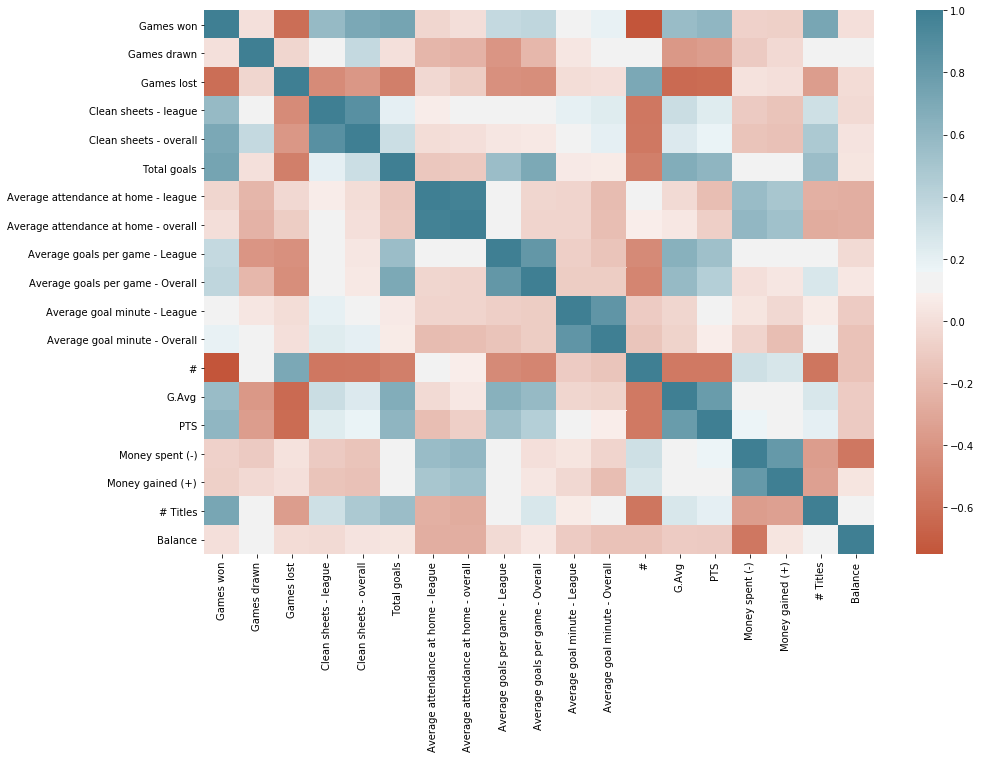

In [32]:
sns.heatmap(AnovaTable.corr(), cmap=sns.diverging_palette(20, 220, as_cmap=True))
#plt.savefig('/Users/jaimebecerra/Desktop/corr.png')